# Image Reconstruction

Image reconstruction in MRI means converting the raw signal collected in k-space into images.  For a fully-sampled acquisition using Cartesian sampling (e.g. on a grid), this can be done with a discrete Fourier Transform.  In anticipation of advanced reconstruction methods, image reconstruction for MRI is formulated as a linear system.

## Learning Goals

1. Describe how images are formed
    * Describe how MRI raw data is reconstructed into an image
1. Manipulate and analyze MRI data
    * Reconstruct an image from raw data


## Sorting the MRI Data into k-space

Recall that the MRI signal is proportional to the Fourier Transform of the net magnetization of our object, evaluated at the k-space location defined by the gradients:

$$ s_i(t) = \mathcal{F} \{ M_{XY}(\vec{r},0) \} |_{\vec{k} = \vec{k}_i(t)} $$

Note that this includes a dimension for the readout, $t$, as well as different readouts for each TR, denoted by the subscript for the $i^\mathrm{th}$ TR.

The data acquired during the readout will be sorted into data based on the k-space trajectory.  The following example shows the Cartesian k-space trajectory, which acquired data in a raster fashion in k-space:

![Cartesian k-space trajectory and pulse sequence](images/frequency_phase_encoding-full-image_phase.gif)

From this knowledge, the MR signal over time is stored in a data matrix with known k-space locations to create $M(\vec{k})$.

## Fourier Transform Reconstruction

Once the data has been sorted into the corresponding lines in k-space, an inverse Fourier Transform is applied to reconstruct an image of the transverse magnetization

$$\mathcal{F}^{-1}\{ M(\vec{k} )\} = m(\vec{r})$$

For typical Cartesian sampling, this can be done very simply with the 2D or 3D Fast Fourier Transform (FFT) algorithm.

The following animation illustrates typical k-space data as it would be acquired for different k-space lines (left) and the resulting image as more and more lines of k-space are accumulated

![Image formation from sequential Cartesian k-space data](images/image_formation_sequential.gif)

We can also acquire our k-space lines in a "center-out" or random ordering, shown below

![Image formation from center-out Cartesian k-space data](images/image_formation_centerout_lines.gif)
![Image formation from random Cartesian k-space data](images/image_formation_random_lines.gif)

## Linear System Formulation

Alternatively, the reconstruction can be formulated as a linear system, using a discrete Fourier Transform matrix, $\mathbf{F}$.  For this matrix, the entries are defined by k-space location being sampled, $\vec{k}_i$ and the spatial locations, $\vec{r}_j$:

$$ \mathbf{f}_{i,j} = \exp(-i 2 \pi \vec{k}_i \cdot \vec{r}_j)$$

In this case, the measurement is the discrete Fourier Transform of the image

$$  y = \mathbf{F}x + n $$

and image reconstruction is performed by inverse discrete Fourier Transform, which for fully sampled 2D FT imaging is well defined by matrix inversion:

$$ \hat{x} = \mathbf{F^{H}} y $$

(-0.5, 255.5, 255.5, -0.5)

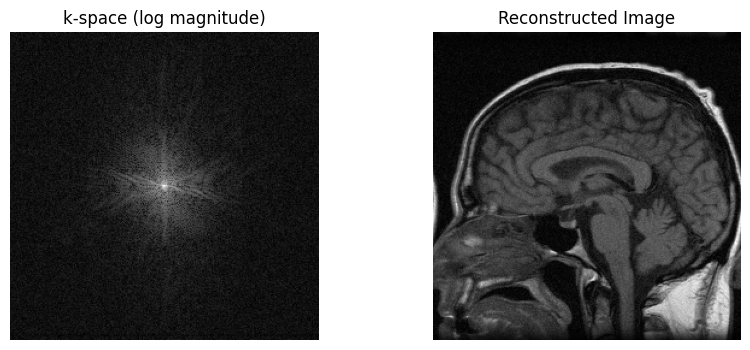

In [11]:
# Sample Image Reconstruction

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load k-space data from .mat file
mat = loadmat('../Data/se_t1_sag_data.mat')
kspace = mat['data']

# Reconstruct the image by inverse FFT
recon_image = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(kspace)))

# Plot k-space data and reconstructed images
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(np.log(np.abs(kspace) + 1e1), cmap='gray')
axs[0].set_title('k-space (log magnitude)')
axs[0].axis('off')

axs[1].imshow(np.abs(recon_image), cmap='gray')
axs[1].set_title('Reconstructed Image')
axs[1].axis('off')
